In [1]:
import numpy as np
import os
import shutil

import matplotlib.pyplot as plt

In [2]:
def load_challenge_data(file):
    with open(file, 'r') as f:
        header = f.readline().strip()
        column_names = header.split('|')
        data = np.loadtxt(f, delimiter='|')

#     # Ignore SepsisLabel column if present.
#     if column_names[-1] == 'SepsisLabel':
#         column_names = column_names[:-1]
#         data = data[:, :-1]

    return data

In [4]:
#
input_directory = "./sepsis_data/train"

files = []
for f in os.listdir(input_directory):
    if os.path.isfile(os.path.join(input_directory, f)) and not f.lower().startswith('.') and f.lower().endswith('psv'):
        files.append(f)

print('Predicting sepsis labels...')
num_files = len(files)
print(num_files)

full_data = []
full_data_0 = []
full_data_1 = []
record_length_0 =[]
record_length_1 = []

for i,f in enumerate(files):
    input_file = os.path.join(input_directory, f)
    data = load_challenge_data(input_file)
    sepsis = data[:,-1]
    sum_in = np.sum(sepsis)

    if sum_in == 0:
        record_length_0.append(len(data))
    else:
        record_length_1.append(len(data))

    for j in range(data.shape[0]):
        full_data.append(data[j,:-1])
        if sum_in == 0:
            full_data_0.append(data[j,:-1])
        else:
            full_data_1.append(data[j,:-1])

Predicting sepsis labels...
28234


In [5]:
print(len(full_data))
full_data_arr = np.array(full_data)
print(full_data_arr.shape)

1084463
(1084463, 40)


In [6]:
print("Median Non-Sepsis: " + str(np.median(record_length_0)) + " Mean: " + str(np.mean(record_length_0)))
print("Median Sepsis: " + str(np.median(record_length_1)) + " Mean: " + str(np.mean(record_length_1)))

print("Max Non-Sepsis: " + str(np.max(record_length_0)) + " Min: " + str(np.min(record_length_0)))
print("Max Sepsis: " + str(np.max(record_length_1)) + " Min: " + str(np.min(record_length_1)))

sorted_length_0 = np.sort(record_length_0)
sorted_length_1 = np.sort(record_length_1)
print(sorted_length_0[-10:])
print(sorted_length_1[-10:])

Median Non-Sepsis: 38.0 Mean: 36.84302192345886
Median Sepsis: 36.0 Mean: 58.40107212475633
Max Non-Sepsis: 336 Min: 8
Max Sepsis: 336 Min: 8
[326 334 336 336 336 336 336 336 336 336]
[305 305 307 310 312 328 330 334 335 336]


In [7]:
#per feature mean, std, %of Nan
avg = np.zeros(full_data_arr.shape[1])
std = np.zeros(full_data_arr.shape[1])
nan_percent = np.zeros(full_data_arr.shape[1])
n = full_data_arr.shape[0]
for idx in range(full_data_arr.shape[1]):
    col = full_data_arr[:,idx]
    nan_count = np.count_nonzero(np.isnan(col))
    nan_percent[idx] = nan_count/n

    avg[idx] = np.mean(full_data_arr[~np.isnan(col),idx])
    std[idx] = np.std(full_data_arr[~np.isnan(col),idx])

In [8]:
# print(avg[0])
# print(std[0])
print(nan_percent*100)

print(len(avg))
print(len(std))
print(len(nan_percent))

[9.92943051e+00 1.31505639e+01 6.62184879e+01 1.45741256e+01
 1.24827680e+01 3.14795433e+01 1.54192444e+01 9.62170217e+01
 9.45873672e+01 9.58229096e+01 9.16957978e+01 9.30828438e+01
 9.44383534e+01 9.65465857e+01 9.83886956e+01 9.31367875e+01
 9.84044638e+01 9.40976317e+01 9.54680796e+01 9.38939364e+01
 9.98091221e+01 8.29250975e+01 9.73454143e+01 9.37023209e+01
 9.59848330e+01 9.06935506e+01 9.85187139e+01 9.90519732e+01
 9.11402233e+01 9.26236303e+01 9.70508906e+01 9.36068819e+01
 9.93437305e+01 9.40621303e+01 0.00000000e+00 0.00000000e+00
 3.95331145e+01 3.95331145e+01 7.37692296e-04 0.00000000e+00]
40
40
40


In [10]:
fm = "./sepsis_data/train/A_p000005.psv"
with open(fm, 'r') as f:
    header = f.readline().strip()
    column_names = header.split('|')

In [13]:
cx = column_names[:-1]

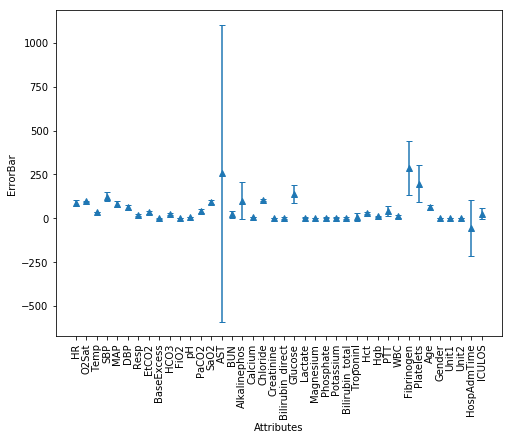

In [19]:
x = range(full_data_arr.shape[1])

plt.figure(figsize=(8, 6))
plt.errorbar(x, avg, std, linestyle='None', marker='^', capsize=3)
plt.xticks(x, cx, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("ErrorBar")
# plt.show()
plt.savefig("Test_attributes_errorbar.png")

In [22]:
np.argmax(std)

14

ValueError: operands could not be broadcast together with shapes (14,) (25,) 

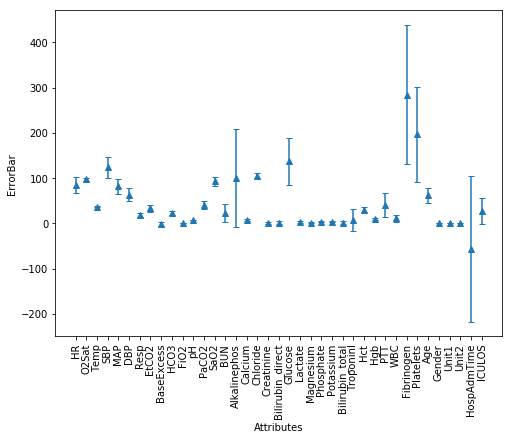

In [35]:
x = (range(full_data_arr.shape[1]-1))

plt.figure(figsize=(8, 6))
plt.errorbar(x, list(avg[:14])+list(avg[15:]), list(std[:14])+list(std[15:]), linestyle='None', marker='^', capsize=3)
plt.xticks(x, list(cx[:14])+list(cx[15:]), rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("ErrorBar")
# plt.show()
plt.savefig("Test_attributes_errorbar.png")

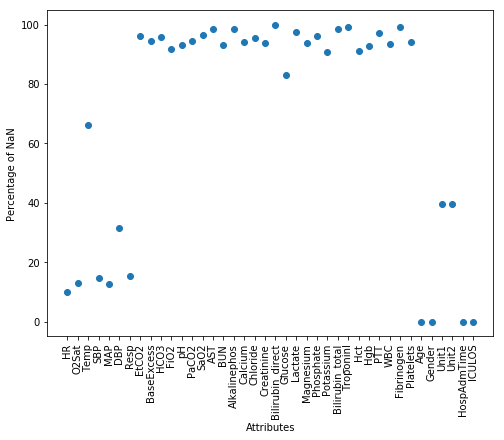

In [41]:
x = range(full_data_arr.shape[1])

plt.figure(figsize=(8,6))
plt.scatter(x, nan_percent*100)
plt.xticks(x, cx, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("Percentage of NaN")
# plt.show()
plt.savefig("train_nan_percent.png")

In [71]:
## for sepsis and non-sepsis patient separately
#per feature mean, std, %of Nan
full_data_arr_0= np.array(full_data_0)
avg_0 = np.zeros(full_data_arr_0.shape[1])
std_0 = np.zeros(full_data_arr_0.shape[1])
nan_percent_0 = np.zeros(full_data_arr_0.shape[1])
n_0 = full_data_arr_0.shape[0]
for idx in range(full_data_arr_0.shape[1]):
    col = full_data_arr_0[:,idx]
    nan_count = np.count_nonzero(np.isnan(col))
    nan_percent_0[idx] = nan_count/n_0

    avg_0[idx] = np.mean(full_data_arr_0[~np.isnan(col),idx])
    std_0[idx] = np.std(full_data_arr_0[~np.isnan(col),idx])

full_data_arr_1= np.array(full_data_1)
avg_1 = np.zeros(full_data_arr_1.shape[1])
std_1 = np.zeros(full_data_arr_1.shape[1])
nan_percent_1 = np.zeros(full_data_arr_1.shape[1])
n_1 = full_data_arr_1.shape[0]
for idx in range(full_data_arr_1.shape[1]):
    col = full_data_arr_1[:,idx]
    nan_count = np.count_nonzero(np.isnan(col))
    nan_percent_1[idx] = nan_count/n_1

    avg_1[idx] = np.mean(full_data_arr_1[~np.isnan(col),idx])
    std_1[idx] = np.std(full_data_arr_1[~np.isnan(col),idx])

In [75]:
print(nan_percent_1*100)
print(nan_percent_0*100)
print(nan_percent_0-nan_percent_1)

[ 6.89174643  8.88441993 64.31962884 13.77097606  8.54229424 25.59600798
 12.92400638 88.64977178 91.05967173 94.32989261 83.2308347  88.76325737
 90.73173174 95.01664734 97.71443353 91.93668171 97.71026127 92.54583233
 93.70154958 93.13579052 99.69125243 81.85315298 94.67452165 92.0484984
 94.57605621 88.43948965 98.02568446 99.29989402 90.1584626  91.64629211
 96.03384541 92.64513222 98.96444396 93.42117341  0.          0.
 48.58017841 48.58017841  0.          0.        ]
[1.03068138e+01 1.36805636e+01 6.64543905e+01 1.46739040e+01
 1.29723084e+01 3.22104779e+01 1.57292375e+01 9.71571307e+01
 9.50256266e+01 9.60083929e+01 9.27474332e+01 9.36194828e+01
 9.48988414e+01 9.67366559e+01 9.84724618e+01 9.32858813e+01
 9.84907073e+01 9.42904178e+01 9.56875425e+01 9.39881239e+01
 9.98237655e+01 8.30582693e+01 9.76772297e+01 9.39077817e+01
 9.61598509e+01 9.09735814e+01 9.85799648e+01 9.90211730e+01
 9.12621913e+01 9.27450488e+01 9.71772421e+01 9.37263638e+01
 9.93908507e+01 9.41417589e+01 0.

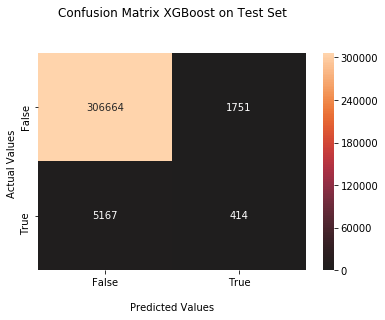

In [57]:
import seaborn as sns

cf_matrix = np.array([[306664,   1751],[  5167,    414]])


ax = sns.heatmap(cf_matrix, annot=True, center=1,fmt='g')

ax.set_title('Confusion Matrix XGBoost on Test Set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

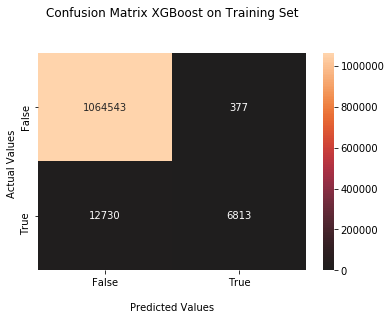

In [58]:
cf_matrix = np.array([[1064543,     377],[  12730,    6813]])



ax = sns.heatmap(cf_matrix, annot=True, center=1,fmt='.7g')

ax.set_title('Confusion Matrix XGBoost on Training Set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

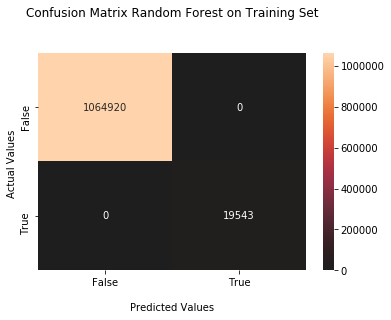

In [59]:
cf_matrix = np.array([[1064920,       0],[      0,   19543]])



ax = sns.heatmap(cf_matrix, annot=True, center=1,fmt='.7g')

ax.set_title('Confusion Matrix Random Forest on Training Set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

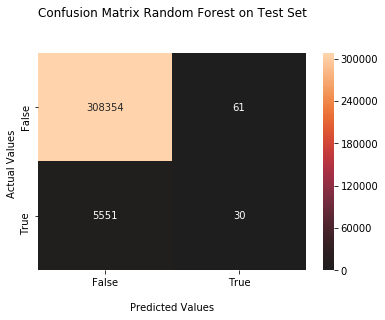

In [60]:
cf_matrix = np.array([[308354,     61],[  5551,     30]])



ax = sns.heatmap(cf_matrix, annot=True, center=1,fmt='.7g')

ax.set_title('Confusion Matrix Random Forest on Test Set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()